<a href="https://colab.research.google.com/github/HaroldRen99/22WEcon441/blob/main/22w441b_In_Class_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Clean data

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/bank-additional-full.csv", sep = ";")

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)

In [ ]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

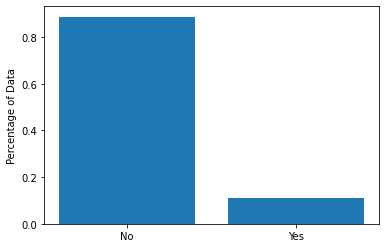

In [ ]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=0)
X_scaled, y_train = ros.fit_resample(X_scaled, y_train)
X_test, y_test = ros.fit_resample(X_test, y_test)

# Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [ ]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

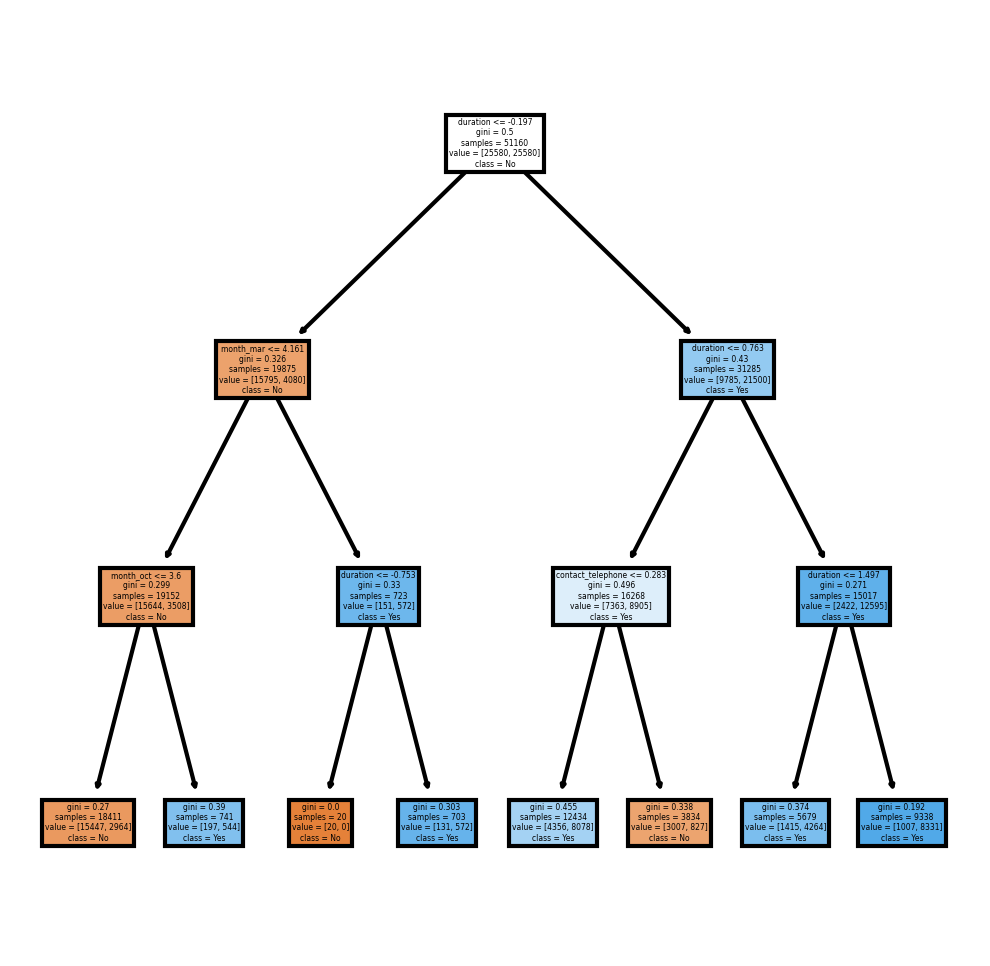

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])
plt.show()
               
#fig.savefig('imagename.png')

## Confusion matrix on out of sample data. Visualize and store as variable

In [ ]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

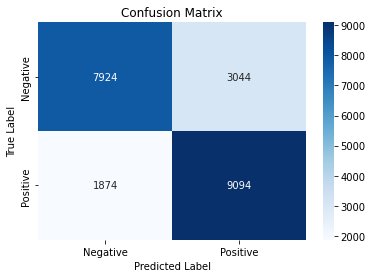

In [ ]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Use bagging on your descision tree 

In [ ]:
dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)

bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.775665572574763


In [ ]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

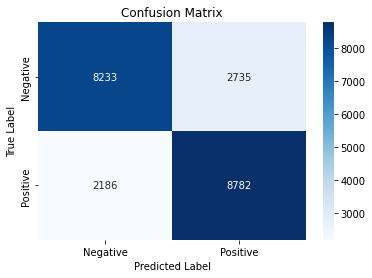

In [ ]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Boost your tree

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)

In [ ]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

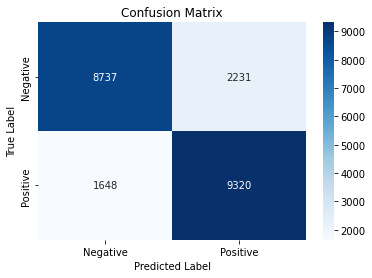

In [ ]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlens.ensemble import SuperLearner

[MLENS] backend: threading


In [ ]:
### SET YOUR BASE LEARNERS
lr = LogisticRegression(random_state=0)
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
knn = KNeighborsClassifier()

In [ ]:
### FIT TO TRAINING DATA
lr.fit(X_scaled, y_train)
dt.fit(X_scaled, y_train)
rf.fit(X_scaled, y_train)
gb.fit(X_scaled, y_train)
knn.fit(X_scaled, y_train)

KNeighborsClassifier()

In [ ]:
### GET base_predictions
ensemble = SuperLearner(scorer=confusion_matrix, random_state=0, verbose=2)
ensemble.add([lr, dt, rf, gb, knn])

base_predictions = ensemble.fit(X_scaled, y_train).predict(X_scaled)


Fitting 1 layers
Processing layer-1             done | 00:01:02
Fit complete                        | 00:01:02

Predicting 1 layers
Processing layer-1             done | 00:00:27
Predict complete                    | 00:00:28


In [ ]:
### TRAIN YOUR METALEARNER
log_reg = LogisticRegression(fit_intercept = False).fit(base_predictions, y_train)

In [ ]:
### INTERPRET COEFFICIENTS
log_reg.coef_

array([[ 9.84442999, -4.20368793, -4.56814589, -3.280869  ,  9.84442999]])

According to the result, we can see that some of the coefficients turn out to be negative. To be specific, the Decision Tree, Random Forest Forecast and the Graidient Boost Classifier seem to negatively influence the Super Learner model, which means we need to lower the weight or try to modify the hyperparameters to get better results.

In terms of Logistic Regression model and KNN model, they seem to positively influence the Super Learner model so we may increase their weight and maybe we can have better prediction results.

In [ ]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
y_true = y_test
y_pred = log_reg.predict(ensemble.predict(X_test))
cm_meta = confusion_matrix(y_true, y_pred)


Predicting 1 layers
Processing layer-1             done | 00:00:11
Predict complete                    | 00:00:11


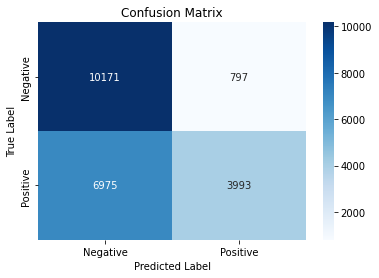

In [ ]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_meta, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities and Specifications (Out of Sample)

In [ ]:
# Compute the sensitivity and specificity of each model
model_list = ['raw','bag','boost','meta']
for i in model_list:
  exec("{}_sensitivity = cm_{}[0, 0] / (cm_{}[0, 0] + cm_{}[1, 0])".format(i,i,i,i))
  exec("{}_specificity = cm_{}[1, 1] / (cm_{}[0, 1] + cm_{}[1, 1])".format(i,i,i,i))

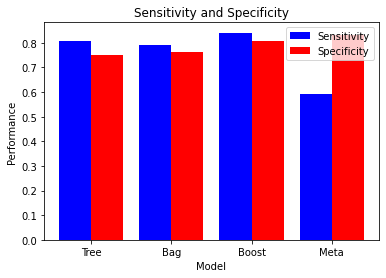

In [ ]:
# Create bar charts
sensitivity = [raw_sensitivity, bag_sensitivity, boost_sensitivity, meta_sensitivity]
specificity = [raw_specificity, bag_specificity, boost_specificity, meta_specificity]
labels = ['Tree', 'Bag', 'Boost', 'Meta']
x = [i for i in range(len(labels))]

fig, ax = plt.subplots()
rects1 = ax.bar(x, sensitivity, width=0.4, color='b', label='Sensitivity')
rects2 = ax.bar([i + 0.4 for i in x], specificity, width=0.4, color='r', label='Specificity')

# Labels and titles
ax.set_xlabel('Model')
ax.set_ylabel('Performance')
ax.set_xticks([i + 0.2 for i in x])
ax.set_xticklabels(labels)
ax.legend()
ax.set_title('Sensitivity and Specificity')

plt.show()